# Ligand-based Pharmacophores

Pharmacophores can be obtanied from a set of ligands that are known to have activity against the receptor of interest. This is called ligand-based pharmacophore modelling and it is usually carried out by extracting common chemical features from 3D structures of a set of known ligands representative of essential interactions between the ligands and a specific macromolecular target. 

A variety of methods exists to extract a common pharmacophore from a set of ligands. Different algorithms such as the genetic algorithm, clique detection, gibbs sampling, etc. have been used succesfully to derive ligand-based pharmacophores. Currently OpenPharmacophore only supports a algorithm based on density based cluestering. Future versions of the library will implement other algorithms.

In this tutorial we will explore how to construct ligand based pharmacophores with OpenPharmacophore. 

In [1]:
from openpharmacophore import LigandBasedPharmacophore
from openpharmacophore.utils.load_custom_feats import load_smarts_fdef
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*')

from IPython.display import Image

2021-11-03 14:57:47,304 [WARNING] [__init__.py:5] root: Warning: importing 'simtk.openmm' is deprecated.  Import 'openmm' instead.


## Pharmacophore for Non-Peptide Angiotensin II Receptor antagonists

We will derive a pharmacophore model from a set of 5 ligands of the non-peptide angiotensin receptor. 

A ligand-based pharmacophore can be created using the LiganBasedPharmacophore class. A pharmacophore then can be created from a list of rdkit molecules or by passing a molecule file such as a smi, mol2 or sdf file. 

The LiganBasedPharmacophore class is derived from the Pharmacophore class, so it functions in a similar way.

We will obtain the pharmacophore model from a list of rdkit molecules.

5 molecules


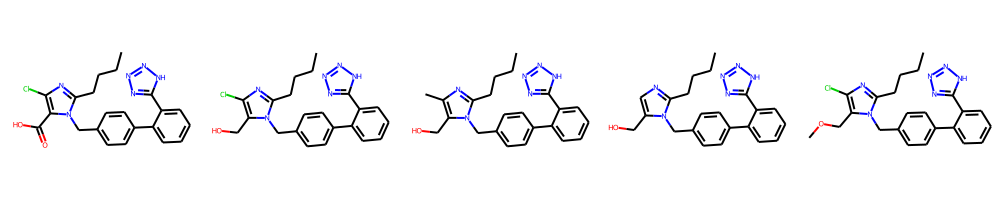

In [2]:
# Load the molecules and visualize them
molecules = Chem.SmilesMolSupplier('../../../openpharmacophore/data/ligands/clique_detection.smi',delimiter='\t',titleLine=False)
print(f"{len(molecules)} molecules")
img = Draw.MolsToGridImage(molecules, molsPerRow=5, returnPNG=False)
img

To create the pharmacophore the class method from_ligand_list can be used. Otherwise, the from_file method can be used. Besides the ligands, this method also expects a "method" argument, a "feat_list" and a "feat_def" argument.

The "method" argument is the algorithm that will be used to obtain the common pharmacophore. Currently, only the density based clustering algorithm or dbscan is implemented.

"feat_list" is a an optional list with the pharmacophoric features that will be taken into account. For example, if we would like to obtain a pharmacophore with only hydrogen bond donors an aromatic rings we wil pass the list ["hb donor", "aromatic ring"]

The "feat_def" argument stands for feature definition. A feature definition is a set of smarts strings that are used to define chemical features within a ligand. Openpharmacophore uses the default definition implemented in rdkit; however, a custom definion can be passed as we will do in this example.

In [3]:
# Let's load a custom feature definition
# First take a look at the file
! head ../../../openpharmacophore/data/smarts_features.txt -n 10

# lines started from # are comments
#
# each line is SMARTS and feature label
#
# Aromatic
a1aaaaa1 Aromatic
a1aaaa1 Aromatic

# HBD
[#7!H0&!$(N-[SX4](=O)(=O)[CX4](F)(F)F)] Donor


A custom feature defintion can be loaded froma file similar to the one above. This is a file with the smarts strings followed by the name of the chemical feature. We can use the function load_smarts_fdef to obtain a dictionary of smarts and feature names.

In [4]:
feat_def = load_smarts_fdef("../../../openpharmacophore/data/smarts_features.txt")
feat_def

{'a1aaaaa1': 'Aromatic',
 'a1aaaa1': 'Aromatic',
 '[#7!H0&!$(N-[SX4](=O)(=O)[CX4](F)(F)F)]': 'Donor',
 '[#8!H0&!$([OH][C,S,P]=O)]': 'Donor',
 '[#16!H0]': 'Donor',
 '[#7&!$([nX3])&!$([NX3]-*=[!#6])&!$([NX3]-[a])&!$([NX4])&!$(N=C([C,N])N)]': 'Acceptor',
 '[$([O])&!$([OX2](C)C=O)&!$(*(~a)~a)]': 'Acceptor',
 '[$([NX3]([CX4])([CX4,#1])[CX4,#1])&!$([NX3]-*=[!#6])]': 'PosIonizable',
 '[$([CX3](=N)(-N)[!N])](=N)-N': 'PosIonizable',
 'N=[CX3](N)-N': 'PosIonizable',
 '[$([+,+2,+3])&!$(*[-,-2,-3])]': 'PosIonizable',
 'c1nn[nH1]n1': 'NegIonizable',
 '[$([SX4,PX4](=O)(=O)[O-,OH])](=O)(=O)[O-,OH]': 'NegIonizable',
 '[$([CX3,SX3,PX3](=O)[O-,OH])](=O)[O-,OH]': 'NegIonizable',
 '[$([-,-2,-3])&!$(*[+,+2,+3])]': 'NegIonizable',
 '[$([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])&!$(**[CH3X4,CH2X3,CH1X2,F,Cl,Br,I])]': 'Hydrophobe',
 '[$(*([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])[CH3X4,CH2X3,CH1X2,F,Cl,Br,I])&!$(*([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])([CH3X4,CH2X3,CH1X2,F,Cl,Br,I])[CH3X4,CH2X3,CH1X2,F,Cl,Br,I])]([CH3X4,CH2X3,CH1X2,F,Cl,Br

Now we are ready to create the pharmacophore

In [5]:
# Create the pharmacophore
molecules = list(molecules)
pharmacophore = LigandBasedPharmacophore().from_ligand_list(ligands=molecules, 
                                                            method="dbscan", 
                                                            feat_list=None, 
                                                            feat_def=feat_def)
print(pharmacophore)

LigandBasedPharmacophore(n_elements: 6)


In [6]:
print(pharmacophore.elements)

[HbAcceptorSphere(center: (-3.2099, 0.6359, 2.4323); radius: 1.0), HbAcceptorSphere(center: (-1.5734, 4.2674, 0.3026); radius: 1.0), AromaticRingSphere(center: (1.0191, 0.7249, -0.9843); radius: 1.0), AromaticRingSphere(center: (-2.6875, 1.3437, 1.7495); radius: 1.0), HbDonorSphere(center: (4.146, -1.3919, 1.8679); radius: 1.0), HydrophobicitySphere(center: (-4.8432, -1.7925, -0.4132); radius: 1.0)]


We can visualize the pharmacophoric features in each of the ligands using the draw method.

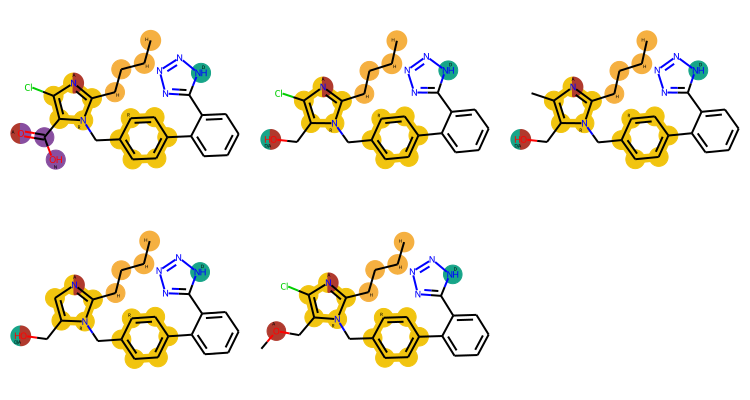

In [7]:
Image(pharmacophore.draw(n_per_row=3))

In [8]:
pharmacophore.elements

[HbAcceptorSphere(center: (-3.2099, 0.6359, 2.4323); radius: 1.0),
 HbAcceptorSphere(center: (-1.5734, 4.2674, 0.3026); radius: 1.0),
 AromaticRingSphere(center: (1.0191, 0.7249, -0.9843); radius: 1.0),
 AromaticRingSphere(center: (-2.6875, 1.3437, 1.7495); radius: 1.0),
 HbDonorSphere(center: (4.146, -1.3919, 1.8679); radius: 1.0),
 HydrophobicitySphere(center: (-4.8432, -1.7925, -0.4132); radius: 1.0)]

Finally we can visualize the pharmacophore with it's ligands.

In [9]:
view = pharmacophore.show(show_ligands=True)
view

NGLWidget()

In [12]:
view.render_image()

Image(value=b'', width='99%')

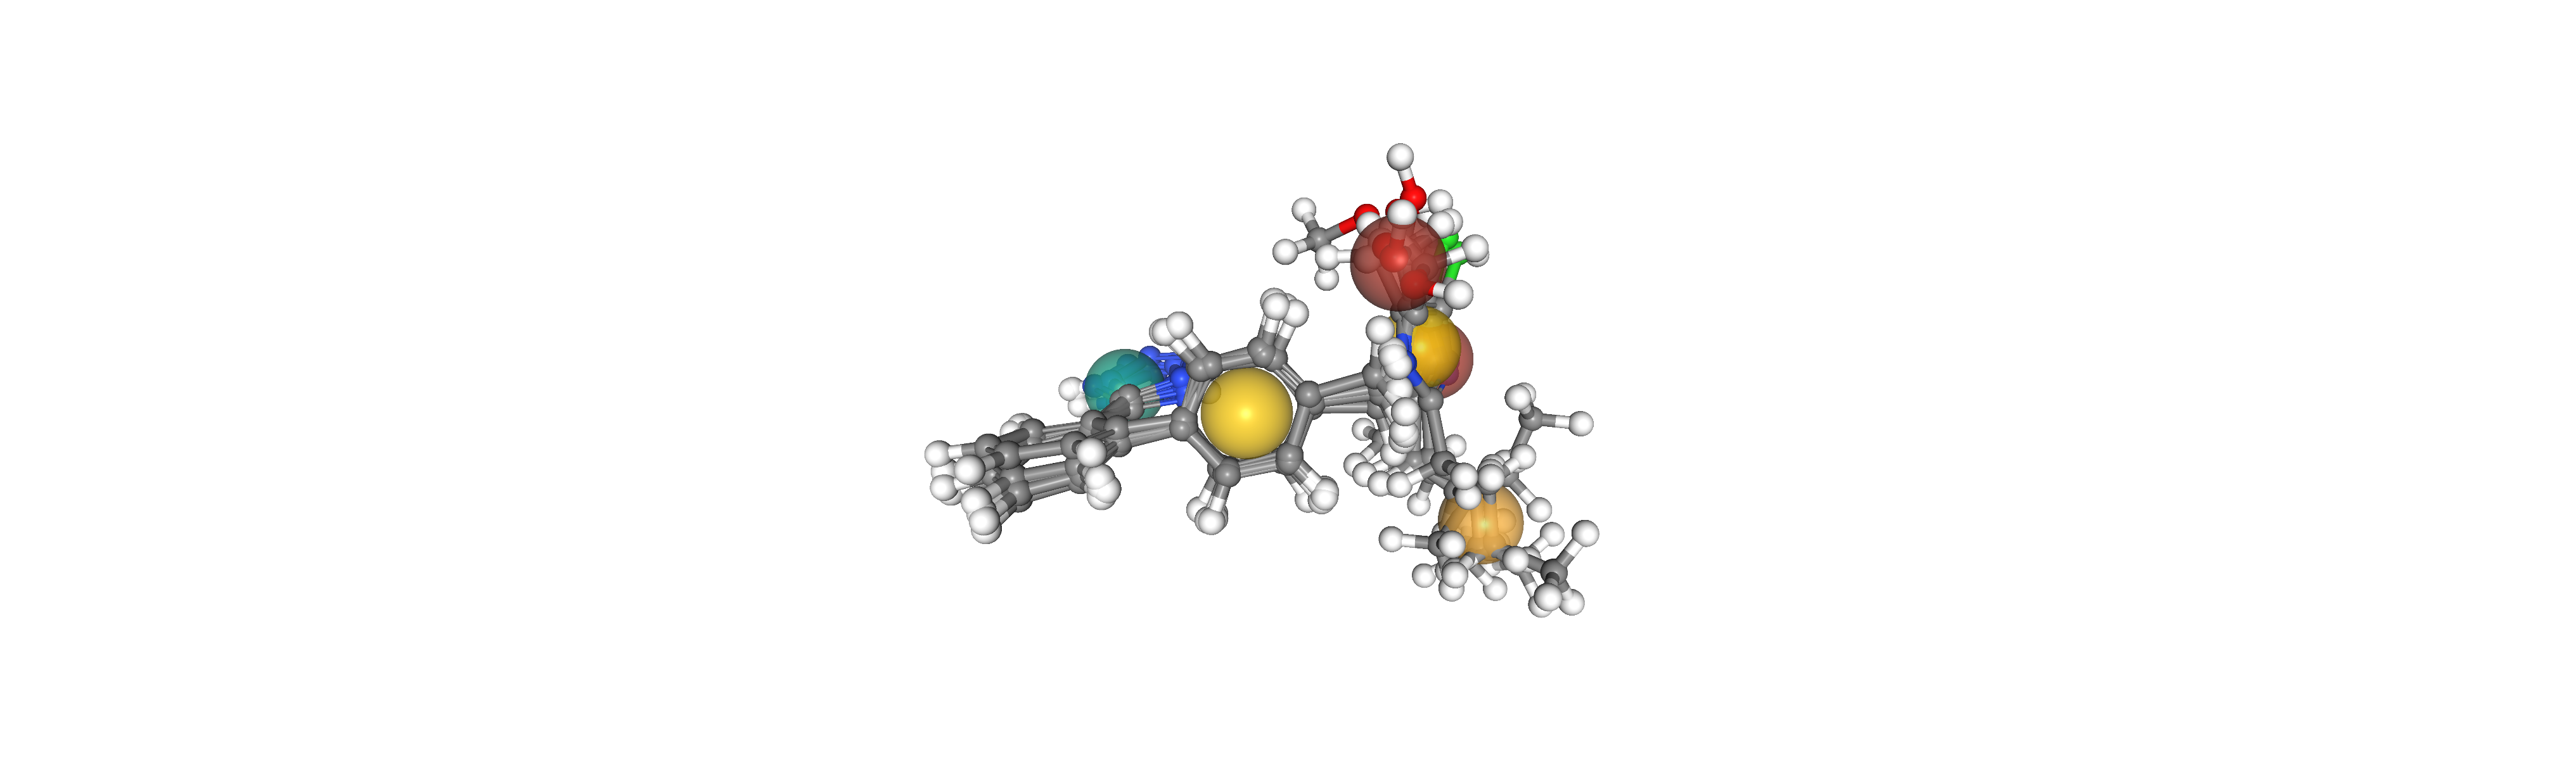

In [13]:
view._display_image()

<strong>References</strong>

[1] Yang, Sheng-Yong. "Pharmacophore modeling and applications in drug discovery: challenges and recent advances." Drug discovery today 15, no. 11-12 (2010): 444-450.